In [1]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 24.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import  xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import warnings
import math
from tqdm.auto import tqdm

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

from cartopy.util import add_cyclic_point
from matplotlib import animation
from tqdm.auto import tqdm
from datetime import datetime,timedelta

from matplotlib.cm import get_cmap
warnings.filterwarnings("ignore")

In [ ]:
ds=xr.open_dataset('/content/drive/MyDrive/AP_HW/ERA5 Data/LS heat flux/lshf-2024.nc')
ds

<xarray.Dataset> Size: 2GB
Dimensions:     (valid_time: 2928, latitude: 209, longitude: 381)
Coordinates:
    expver      (valid_time) object 23kB ...
  * valid_time  (valid_time) datetime64[ns] 23kB 2024-01-01 ... 2024-12-31T21...
  * longitude   (longitude) float64 3kB 25.0 25.25 25.5 ... 119.5 119.8 120.0
  * latitude    (latitude) float64 2kB 52.0 51.75 51.5 51.25 ... 0.5 0.25 0.0
    number      int32 4B ...
Data variables:
    mslhf       (valid_time, latitude, longitude) float32 933MB ...
    msshf       (valid_time, latitude, longitude) float32 933MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-26T10:08 GRIB to CDM+CF via cfgrib-0.9.1...

# MAM

In [ ]:
# @title Heat date list
list_hw=pd.read_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/HW_list_rolling_def.csv')
list_hw['Starting_Date'] = pd.to_datetime(list_hw["Starting_Date"])
list_hw['Ending_Date'] = pd.to_datetime(list_hw["Ending_Date"])

# separate hw for mam season
mam_hw_list =list_hw[(list_hw['Starting_Date'].dt.month >= 3) & (list_hw['Starting_Date'].dt.month <= 5)]
mam_hw_list.reset_index(inplace=True,drop=True)
mam_hw_list

,Starting_Date,Ending_Date,Duration
0,1972-04-23,1972-04-25,3
1,1972-05-08,1972-05-19,12
2,1973-03-31,1973-04-05,6
3,1973-04-07,1973-04-10,4
4,1973-04-15,1973-04-19,5
...,...,...,...
99,2023-05-29,2023-06-08,11
100,2024-04-01,2024-04-06,6
101,2024-04-12,2024-05-05,24
102,2024-05-14,2024-05-17,4


In [ ]:
# @title Event data for composite analysis-anomaly


import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
import numpy as np
import matplotlib.colors as colors

lshf_anom_list=[]


for i in tqdm(range(len(mam_hw_list['Starting_Date']))):
  # variables
  year=mam_hw_list['Starting_Date'].dt.year.iloc[i]
  start_time =str(mam_hw_list['Starting_Date'][i])
  end_time = str(mam_hw_list['Ending_Date'][i])
  start_time =str(np.datetime64(start_time) - np.timedelta64(6, 'h')) # Substracting 6hrs to convert to BD time.
  end_time =str(np.datetime64(end_time) - np.timedelta64(6, 'h')+ np.timedelta64(24,'h')) # Adding 24hrs to include the end date too.
  time_range=slice(start_time,end_time)
  event_no=i+1
  ###################################
  ############# olr ################
  # Load the files
  ds_lshf = xr.open_dataset(f"/content/drive/MyDrive/AP_HW/ERA5 Data/LS heat flux/lshf-{year}.nc")
  lshf_clim=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/climatology/data/hf/hf_climatology-mam.nc')


  ds_lshf=ds_lshf.sel(valid_time=time_range)
  ds_lshf=ds_lshf.mean(dim='valid_time',skipna=True)
  lshf_anom=ds_lshf-lshf_clim
  lshf_anom=lshf_anom.assign_coords(event_no=event_no)
  lshf_anom_list.append(lshf_anom)
# lshf_anom
lshf_events_anom_mam=xr.concat(lshf_anom_list,dim='event_no')
lshf_events_anom_mam.to_netcdf('/content/drive/MyDrive/AP_HW/Scripts-ll/hf/data/lshf_events_anom-mam.nc')

  0%|          | 0/104 [00:00<?, ?it/s]

In [ ]:
# @title Heat date list
list_hw=pd.read_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/HW_list_rolling_def.csv')
list_hw['Starting_Date'] = pd.to_datetime(list_hw["Starting_Date"])
list_hw['Ending_Date'] = pd.to_datetime(list_hw["Ending_Date"])

# separate hw for jjas season
jjas_hw_list =list_hw[(list_hw['Starting_Date'].dt.month >= 6) & (list_hw['Starting_Date'].dt.month <= 9)]
jjas_hw_list.reset_index(inplace=True,drop=True)
jjas_hw_list


,Starting_Date,Ending_Date,Duration
0,1972-06-06,1972-06-12,7
1,1972-07-11,1972-07-13,3
2,1972-07-23,1972-07-26,4
3,1972-09-18,1972-09-20,3
4,1977-09-05,1977-09-07,3
...,...,...,...
130,2024-07-13,2024-07-31,19
131,2024-08-13,2024-08-15,3
132,2024-08-29,2024-08-31,3
133,2024-09-02,2024-09-13,12


In [ ]:
# @title Event data for composite analysis-anomaly


import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
import numpy as np
import matplotlib.colors as colors

lshf_anom_list=[]

# i=1
for i in tqdm(range(len(jjas_hw_list['Starting_Date']))):
  year=jjas_hw_list['Starting_Date'].dt.year.iloc[i]
  start_time =str(jjas_hw_list['Starting_Date'][i])
  end_time = str(jjas_hw_list['Ending_Date'][i])
  # start_time =str(np.datetime64(start_time) - np.timedelta64(6, 'h'))
  # end_time =str(np.datetime64(end_time) + np.timedelta64(17, 'h'))
  start_time =str(np.datetime64(start_time) - np.timedelta64(6, 'h')) # Substracting 6hrs to convert to BD time.
  end_time =str(np.datetime64(end_time) - np.timedelta64(6, 'h')+ np.timedelta64(24,'h')) # Adding 24hrs to include the end date too.
  time_range=slice(start_time,end_time)
  event_no=i+1
  ###################################
  ############# olr ################
  # Load the files
  ds_lshf = xr.open_dataset(f"/content/drive/MyDrive/AP_HW/ERA5 Data/LS heat flux/lshf-{year}.nc")
  lshf_clim=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/climatology/data/hf/hf_climatology-jjas.nc')


  ds_lshf=ds_lshf.sel(valid_time=time_range)
  ds_lshf=ds_lshf.mean(dim='valid_time',skipna=True)
  lshf_anom=ds_lshf-lshf_clim
  lshf_anom=lshf_anom.assign_coords(event_no=event_no)
  lshf_anom_list.append(lshf_anom)
lshf_events_anom_jjas=xr.concat(lshf_anom_list,dim='event_no')
lshf_events_anom_jjas.to_netcdf('/content/drive/MyDrive/AP_HW/Scripts-ll/hf/data/lshf_events_anom-jjas.nc')

  0%|          | 0/135 [00:00<?, ?it/s]

In [ ]:
print('done')

done


# Plot

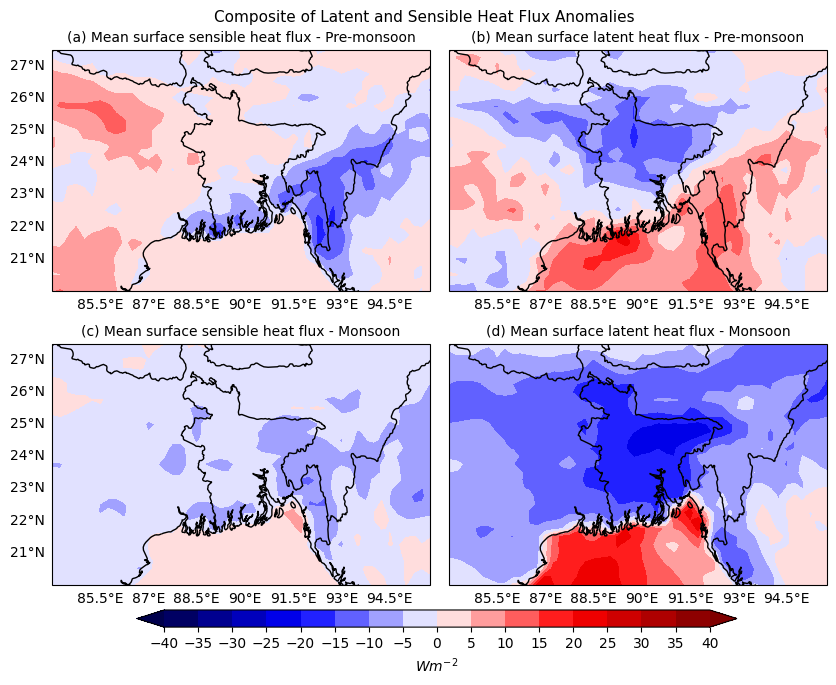

In [5]:
levels=np.arange(-40, 40 + 1, 5)
projection=ccrs.PlateCarree()
fig,axes=plt.subplots(ncols=2,nrows=2,subplot_kw={'projection':projection},figsize=(10, 25))
# Data load
hf=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/hf/data/lshf_events_anom-mam.nc')
# wind
# # Spatial region
lat_range=slice(27.5,20.00)
lon_range=slice(84,95.75)

hf=hf.sel(latitude=lat_range,longitude=lon_range)
hf_anom=hf.mean(dim='event_no',skipna=True)

latitude_hf=hf_anom['latitude'].values
longitude_hf=hf_anom['longitude'].values

# mslhf plot
ax=axes[0,1]
contourf=ax.contourf(longitude_hf,latitude_hf,hf_anom.mslhf,levels=levels,cmap='seismic',extend='both',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.01,fraction=0.06, label="${Pa}$")

ax.gridlines(draw_labels=['bottom'],visible=False)

ax.coastlines()
ax.set_title("(b) Mean surface latent heat flux - Pre-monsoon",fontsize=10)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))
# msshf plot
ax=axes[0,0]
contourf=ax.contourf(longitude_hf,latitude_hf,hf_anom.msshf,levels=levels,cmap='seismic',extend='both',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.01,fraction=0.06, label="${Pa}$")

ax.gridlines(draw_labels=['left','bottom'],visible=False)

ax.coastlines()
ax.set_title("(a) Mean surface sensible heat flux - Pre-monsoon",fontsize=10)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))

#jjas
# Data load
hf=xr.open_dataset(f'/content/drive/MyDrive/AP_HW/Scripts-ll/hf/data/lshf_events_anom-jjas.nc')

# Spatial region
# lat_range=slice(52,0)
# lon_range=slice(25,120)
lat_range=slice(27.5,20.00)
lon_range=slice(84,95.75)

hf=hf.sel(latitude=lat_range,longitude=lon_range)

hf_anom=hf.mean(dim='event_no',skipna=True)

latitude_hf=hf_anom['latitude'].values
longitude_hf=hf_anom['longitude'].values

# ,levels=levels
# mslhf plot
ax=axes[1,1]
contourf=ax.contourf(longitude_hf,latitude_hf,hf_anom.mslhf,levels=levels,cmap='seismic',extend='both',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.01,fraction=0.06, label="${Pa}$")

ax.gridlines(draw_labels=['bottom'],visible=False)

ax.coastlines()
ax.set_title("(d) Mean surface latent heat flux - Monsoon",fontsize=10)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))
# msshf plot
ax=axes[1,0]
contourf=ax.contourf(longitude_hf,latitude_hf,hf_anom.msshf,levels=levels,cmap='seismic',extend='both',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.01,fraction=0.06, label="${Pa}$")


ax.gridlines(draw_labels=['left','bottom'],visible=False)

ax.coastlines()
ax.set_title("(c) Mean surface sensible heat flux - Monsoon",fontsize=10)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))

# Create a single colorbar for both subplots
# Get the contour levels from the first subplot
cbar = plt.colorbar(contourf, ax=axes, orientation='horizontal', pad=0.01, fraction=0.02, aspect=35, label="${W} {m}^{-2}$")
cbar.set_ticks(levels[::1])  # Set the colorbar ticks to match the levels used in contour plots
# Adjust colorbar position if needed
cbar.ax.set_position([0.21, 0.075, 0.6, 0.025]) # [left, bottom, width, height]
# plt.tight_layout()
plt.subplots_adjust( wspace=0.05,hspace=-0.825,top=0.9)
plt.suptitle('Composite of Latent and Sensible Heat Flux Anomalies ', x=0.5, y=0.34,fontsize=11)
plt.show()
# fig.savefig(f'/content/drive/MyDrive/AP_HW/Results/HF/Composite_Anomaly_of_HF.png', dpi=300, bbox_inches='tight')

In [ ]:
print('executed all the lines')

executed all the lines
